In [21]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [22]:
# Cargar archivos

df_player_data = pd.read_csv('res/player_data.csv')
df_players = pd.read_csv('res/players.csv')
df_season_stats = pd.read_csv('res/Seasons_Stats.csv')

In [23]:
df_players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [24]:
df_season_stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [25]:
df_player_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [26]:
df_players.shape

(3922, 8)

In [27]:
df_season_stats.shape

(24691, 53)

In [28]:
df_player_data.shape

(4550, 8)

In [29]:
# Renombrar la columna name por Player.

df_data = df_player_data.rename(columns = {'name':'Player'})
df_data

,Player,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University
...,...,...,...,...,...,...,...,...
4545,Ante Zizic,2018,2018,F-C,6-11,250.0,"January 4, 1997",NaN
4546,Jim Zoet,1983,1983,C,7-1,240.0,"December 20, 1953",Kent State University
4547,Bill Zopf,1971,1971,G,6-1,170.0,"June 7, 1948",Duquesne University
4548,Ivica Zubac,2017,2018,C,7-1,265.0,"March 18, 1997",NaN


In [30]:
# Unión de los tres Dataframe por Player.

df_ply_data = pd.merge(df_players, df_data, on= 'Player')
df_info_all = pd.merge(df_ply_data, df_season_stats, on='Player')
df_info_all.head()

,Unnamed: 0_x,Player,height_x,weight_x,collage,born,birth_city,birth_state,year_start,year_end,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN,1949,1951,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN,1949,1951,...,0.644,NaN,NaN,89.0,77.0,NaN,NaN,NaN,97.0,202.0
2,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,1950,1952,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
3,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,1950,1952,...,0.649,NaN,NaN,100.0,115.0,NaN,NaN,NaN,98.0,152.0
4,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,1950,1952,...,0.588,NaN,NaN,81.0,70.0,NaN,NaN,NaN,56.0,126.0


In [31]:
df_info_all.columns

Index(['Unnamed: 0_x', 'Player', 'height_x', 'weight_x', 'collage', 'born',
       'birth_city', 'birth_state', 'year_start', 'year_end', 'position',
       'height_y', 'weight_y', 'birth_date', 'college', 'Unnamed: 0_y', 'Year',
       'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'blanl',
       'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM', 'BPM', 'VORP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS'],
      dtype='object')

In [32]:
df_info_all.shape

(23468, 67)

LIMPIEZA DATA FRAME

In [33]:
# Eliminar los NaN del dataframe

df_clean = df_info_all.fillna(0)

In [34]:
# Eliminando las columnas height_y(pies) y weight_y(libras)

df_clean = df_clean.drop(['height_y','weight_y'], axis=1)

In [35]:
# Eliminando columnas no necesarias para la investigación

df_clean = df_clean.drop(['birth_city','birth_state','collage','born','Unnamed: 0_y','Unnamed: 0_x'], axis=1)

In [36]:
df_clean=df_clean.drop(['college'], axis=1)

In [37]:
# Columnas con las que se trabajará

df_clean.columns

Index(['Player', 'height_x', 'weight_x', 'year_start', 'year_end', 'position',
       'birth_date', 'Year', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [38]:
# DATAFRAME LIMPIO Y LISTO PARA TRABAJAR

df_clean

,Player,height_x,weight_x,year_start,year_end,position,birth_date,Year,Pos,Age,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Curly Armstrong,180.0,77.0,1949,1951,G-F,"November 1, 1918",1950.0,G-F,31.0,...,0.705,0.0,0.0,0.0,176.0,0.0,0.0,0.0,217.0,458.0
1,Curly Armstrong,180.0,77.0,1949,1951,G-F,"November 1, 1918",1951.0,G-F,32.0,...,0.644,0.0,0.0,89.0,77.0,0.0,0.0,0.0,97.0,202.0
2,Cliff Barker,188.0,83.0,1950,1952,G,"January 15, 1921",1950.0,SG,29.0,...,0.708,0.0,0.0,0.0,109.0,0.0,0.0,0.0,99.0,279.0
3,Cliff Barker,188.0,83.0,1950,1952,G,"January 15, 1921",1951.0,SG,30.0,...,0.649,0.0,0.0,100.0,115.0,0.0,0.0,0.0,98.0,152.0
4,Cliff Barker,188.0,83.0,1950,1952,G,"January 15, 1921",1952.0,SG,31.0,...,0.588,0.0,0.0,81.0,70.0,0.0,0.0,0.0,56.0,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23463,Troy Williams,198.0,97.0,2017,2018,F,"December 30, 1994",2017.0,SF,22.0,...,0.857,9.0,15.0,24.0,6.0,3.0,1.0,6.0,18.0,58.0
23464,Kyle Wiltjer,208.0,108.0,2017,2017,F,"October 20, 1992",2017.0,PF,24.0,...,0.500,4.0,6.0,10.0,2.0,3.0,1.0,5.0,4.0,13.0
23465,Stephen Zimmerman,213.0,108.0,2017,2017,C,"September 9, 1996",2017.0,C,20.0,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
23466,Paul Zipser,203.0,97.0,2017,2018,G-F,"February 18, 1994",2017.0,SF,22.0,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [39]:
# Extraer DataFrame limpio a csv

#df_clean.to_csv('data_clean.csv')

In [40]:
porcentaje_3P = df_clean['3P%']
porcentaje_3P

0        0.000
1        0.000
2        0.000
3        0.000
4        0.000
         ...  
23463    0.381
23464    0.308
23465    0.000
23466    0.333
23467    0.000
Name: 3P%, Length: 23468, dtype: float64

In [41]:
año_temportadas = df_clean['Year'].unique()
sorted(año_temportadas)

[1950.0,
 1951.0,
 1952.0,
 1953.0,
 1954.0,
 1955.0,
 1956.0,
 1957.0,
 1958.0,
 1959.0,
 1960.0,
 1961.0,
 1962.0,
 1963.0,
 1964.0,
 1965.0,
 1966.0,
 1967.0,
 1968.0,
 1969.0,
 1970.0,
 1971.0,
 1972.0,
 1973.0,
 1974.0,
 1975.0,
 1976.0,
 1977.0,
 1978.0,
 1979.0,
 1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0]

In [42]:
media_3P_año = df_clean.groupby('Year')['3P%'].mean()
media_3P_año

Year
1950.0    0.000000
1951.0    0.000000
1952.0    0.000000
1953.0    0.000000
1954.0    0.000000
            ...   
2013.0    0.234282
2014.0    0.243674
2015.0    0.250627
2016.0    0.267248
2017.0    0.278438
Name: 3P%, Length: 68, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

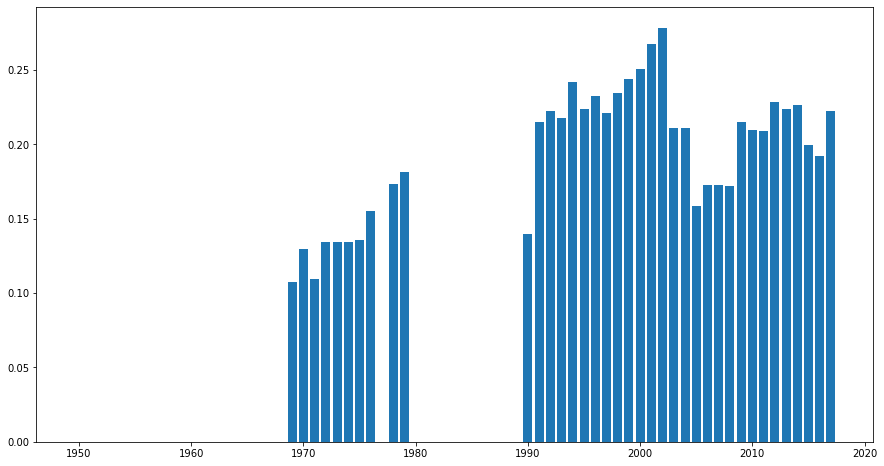

In [43]:
fig, ax = plt.subplots(figsize=(15,8))
ax.bar ( x = año_temportadas, height = media_3P_año)
plt.show

In [44]:
df_clean.loc[:,['Year','Player', '3P%']].max()

Year                  2017.0
Player    Zydrunas Ilgauskas
3P%                      1.0
dtype: object

In [45]:
year_2003 = df_clean[df_clean['Year']==2003]
porc_3p_2003 = year_2003.loc[:,['Player', '3P%']]
porc_3p_2003.max()

Player    Zydrunas Ilgauskas
3P%                      1.0
dtype: object

In [46]:
df_clean_copy = df_clean.copy()
df_clean_copy.head()

,Player,height_x,weight_x,year_start,year_end,position,birth_date,Year,Pos,Age,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Curly Armstrong,180.0,77.0,1949,1951,G-F,"November 1, 1918",1950.0,G-F,31.0,...,0.705,0.0,0.0,0.0,176.0,0.0,0.0,0.0,217.0,458.0
1,Curly Armstrong,180.0,77.0,1949,1951,G-F,"November 1, 1918",1951.0,G-F,32.0,...,0.644,0.0,0.0,89.0,77.0,0.0,0.0,0.0,97.0,202.0
2,Cliff Barker,188.0,83.0,1950,1952,G,"January 15, 1921",1950.0,SG,29.0,...,0.708,0.0,0.0,0.0,109.0,0.0,0.0,0.0,99.0,279.0
3,Cliff Barker,188.0,83.0,1950,1952,G,"January 15, 1921",1951.0,SG,30.0,...,0.649,0.0,0.0,100.0,115.0,0.0,0.0,0.0,98.0,152.0
4,Cliff Barker,188.0,83.0,1950,1952,G,"January 15, 1921",1952.0,SG,31.0,...,0.588,0.0,0.0,81.0,70.0,0.0,0.0,0.0,56.0,126.0


In [47]:
df_clean_P = df_clean_copy[df_clean_copy['position'] == 'C']
df_clean_P

,Player,height_x,weight_x,year_start,year_end,position,birth_date,Year,Pos,Age,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
37,Harry Boykoff,208.0,102.0,1950,1951,C,"July 24, 1922",1950.0,C,27.0,...,0.775,0.0,0.0,0.0,149.0,0.0,0.0,0.0,229.0,779.0
38,Harry Boykoff,208.0,102.0,1950,1951,C,"July 24, 1922",1951.0,C,28.0,...,0.740,0.0,0.0,220.0,60.0,0.0,0.0,0.0,197.0,326.0
39,Harry Boykoff,208.0,102.0,1950,1951,C,"July 24, 1922",1951.0,C,28.0,...,0.714,0.0,0.0,135.0,40.0,0.0,0.0,0.0,130.0,201.0
40,Harry Boykoff,208.0,102.0,1950,1951,C,"July 24, 1922",1951.0,C,28.0,...,0.784,0.0,0.0,85.0,20.0,0.0,0.0,0.0,67.0,125.0
67,Jim Browne,208.0,106.0,1949,1950,C,"January 1, 1930",1950.0,C,20.0,...,0.481,0.0,0.0,0.0,8.0,0.0,0.0,0.0,16.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23450,Edy Tavares,211.0,115.0,2016,2017,C,"March 22, 1992",2017.0,C,24.0,...,0.000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
23451,Edy Tavares,211.0,115.0,2016,2017,C,"March 22, 1992",2017.0,C,24.0,...,0.000,4.0,6.0,10.0,1.0,0.0,6.0,2.0,3.0,6.0
23453,Mike Tobey,213.0,117.0,2017,2017,C,"October 10, 1994",2017.0,C,22.0,...,0.000,2.0,1.0,3.0,1.0,0.0,0.0,1.0,2.0,2.0
23465,Stephen Zimmerman,213.0,108.0,2017,2017,C,"September 9, 1996",2017.0,C,20.0,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0


In [48]:
# información Temporada/año y la media 3P%


tabla_media_triples_P = df_clean_P.groupby('Year')['3P%'].mean()
tabla_media_triples_P


Year
1950.0    0.000000
1951.0    0.000000
1952.0    0.000000
1953.0    0.000000
1954.0    0.000000
            ...   
2013.0    0.089829
2014.0    0.062740
2015.0    0.103279
2016.0    0.087408
2017.0    0.075625
Name: 3P%, Length: 68, dtype: float64

In [49]:
# Información por posición del jugador (P) y la media 3P%

tabla_media_pos_triple = df_clean_copy.groupby('position')['3P%'].mean().reset_index()
tabla_media_pos_triple

,position,3P%
0,0,0.000000
1,C,0.050014
2,C-F,0.056331
3,F,0.154889
4,F-C,0.087107
5,F-G,0.185413
6,G,0.230998
7,G-F,0.204830


## DESCOMPOSCIÓN SERIE TEMPORAL NO ESTACIONARIA

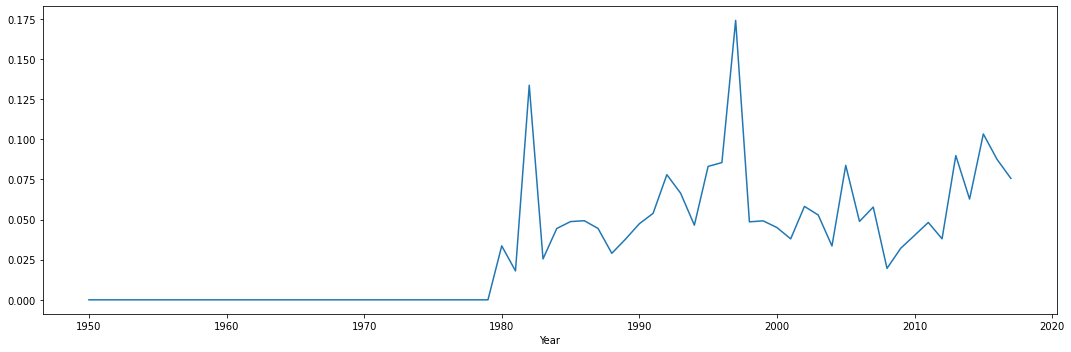

In [50]:
# Descomposición serie temporal NO estacionaria

tabla_media_triples_P.plot(figsize=(15,5))
plt.tight_layout()

In [51]:
TEST_SIZE = 8 # 8 años de test
train, test = tabla_media_triples_P.iloc[: -TEST_SIZE], tabla_media_triples_P.iloc[-TEST_SIZE :]
train.shape, test.shape

((60,), (8,))

In [52]:
x_train = np.array(range(train.shape[0]))
x_test = np.array(range(train.shape[0], tabla_media_triples_P.shape[0]))
x_train, x_test

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 array([60, 61, 62, 63, 64, 65, 66, 67]))

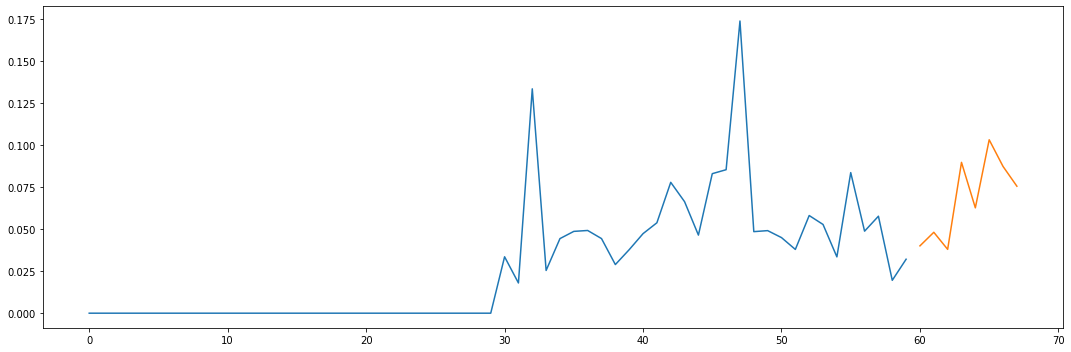

In [53]:
fig, ax = plt.subplots(1 , 1, figsize = (15, 5))
ax.plot(x_train, train)
ax.plot(x_test, test)
plt.tight_layout()

## HETEROCEDASTICIDAD

c:\Users\Marc\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


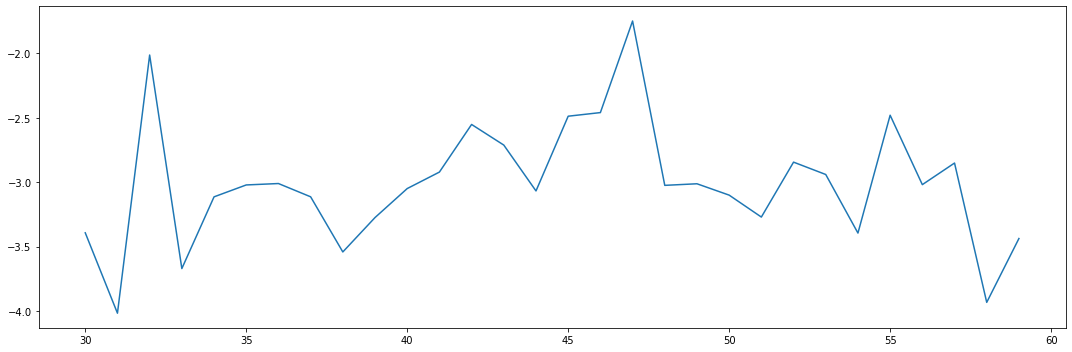

In [54]:
train_log = np.log(train)

fig, ax = plt.subplots(1,1, figsize = (15,5))
ax.plot(x_train, train_log)
plt.tight_layout()

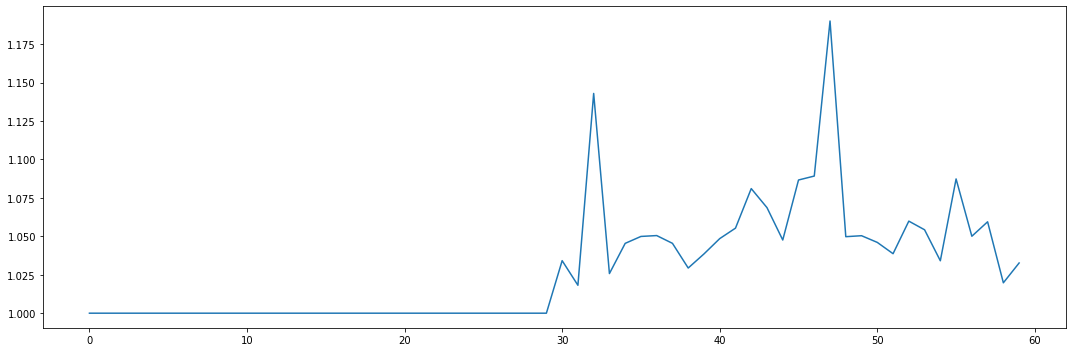

In [55]:
train_exp = np.exp(train)

fig, ax = plt.subplots(1,1, figsize = (15,5))
ax.plot(x_train, train_exp)
plt.tight_layout()

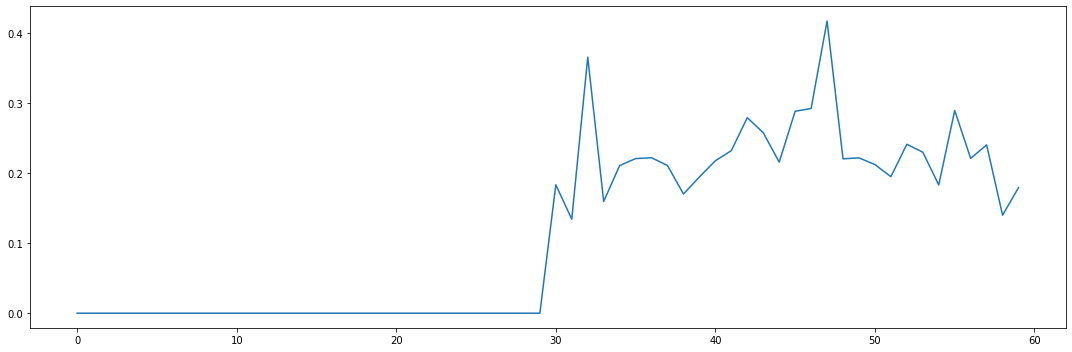

In [56]:
train_sqrt = np.sqrt(train)

fig, ax = plt.subplots(1,1, figsize = (15,5))
ax.plot(x_train, train_sqrt)
plt.tight_layout()

## Tendencia

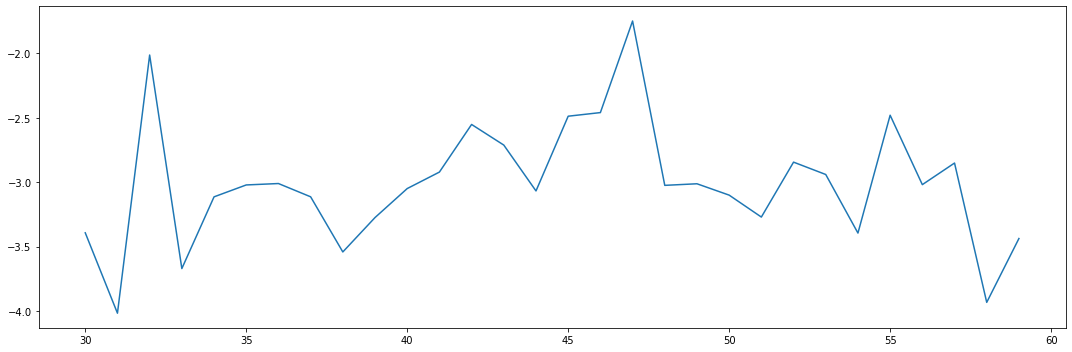

In [57]:
fig, ax = plt.subplots(1 ,1, figsize = (15,5))
ax.plot(x_train, train_log)
plt.tight_layout()

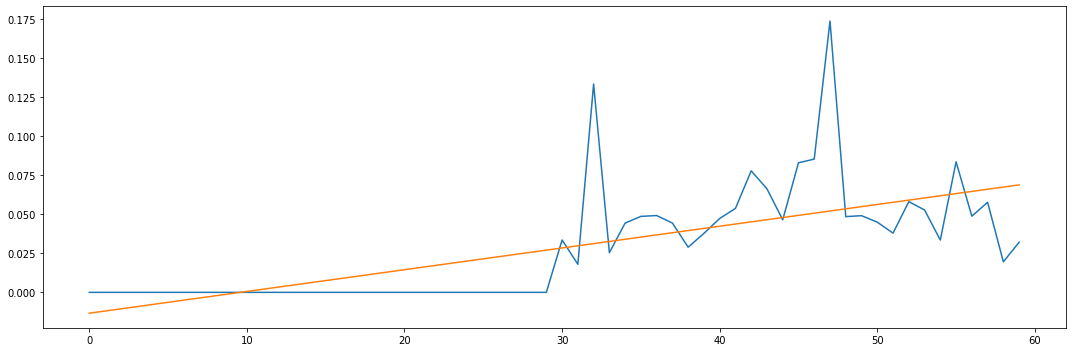

In [58]:
model = LinearRegression()
model.fit(x_train.reshape(-1,1), train.values)
train_trend = model.predict(x_train.reshape(-1,1))

fig, ax = plt.subplots(1,1, figsize =(15,5))
ax.plot(x_train, train)
ax.plot(x_train, train_trend)
plt.tight_layout()

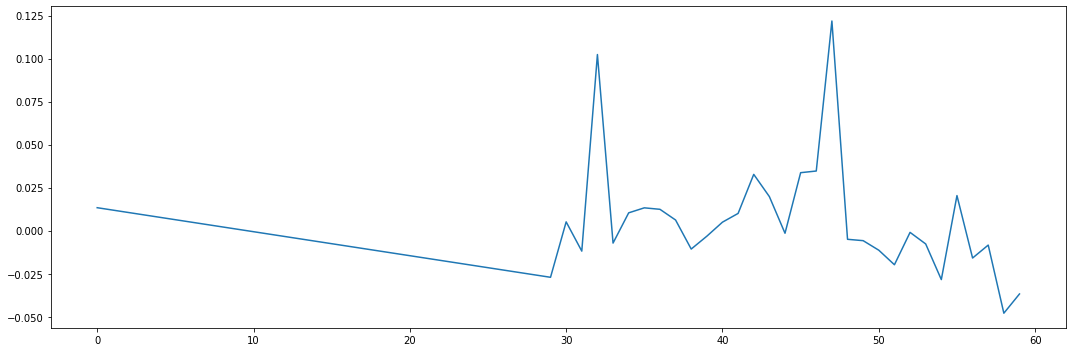

In [59]:
train_trend = (train - model.predict(x_train.reshape(-1,1))).values.squeeze()

fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(x_train, train_trend)
plt.tight_layout()

## Estacionalidad

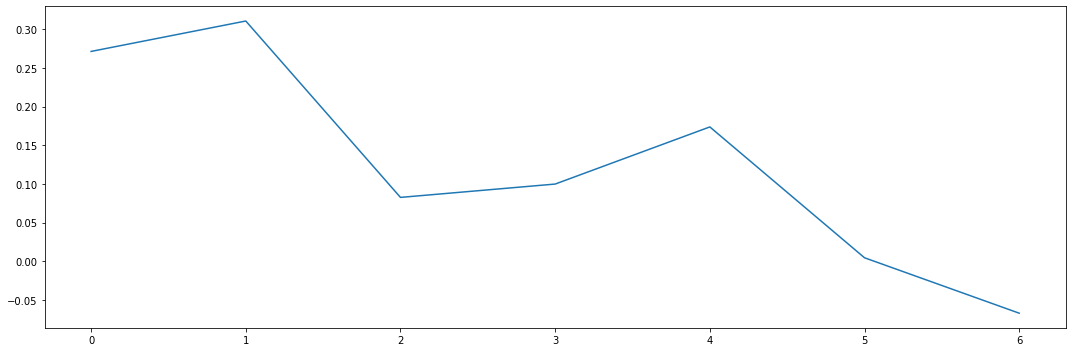

In [60]:
corr_coefficients = []

for i in range(1,8):
    corr_coefficients.append(np.corrcoef(train_trend[i:], train_trend[:-i])[0,1])

fig, ax = plt.subplots(1,1, figsize = (15,5))
ax.plot(range(len(corr_coefficients)), corr_coefficients)
plt.tight_layout()

In [61]:
corr_coefficients

[0.2713798706285745,
 0.3107335358528509,
 0.08249647100826502,
 0.09975184767451586,
 0.17368000736052494,
 0.004380737135345408,
 -0.06733117566055621]

ValueError: could not broadcast input array from shape (4,) into shape (0,8)

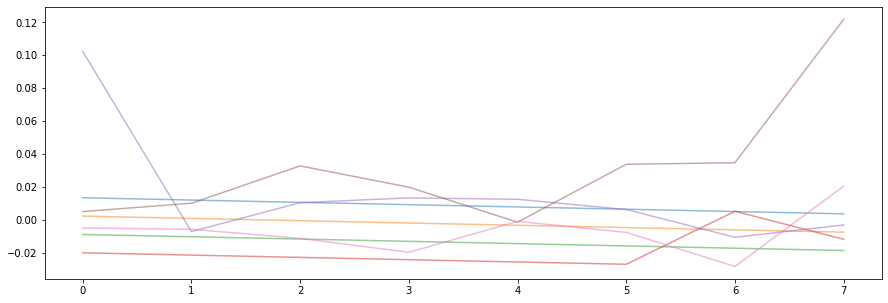

In [62]:
seasonality = np.zeros((int(train_trend.size/8),8))

fig, ax = plt.subplots(1,1, figsize =(15,5))

for i , j in enumerate(range(0, train_trend.size, 8)):
    seasonality[i:] = train_trend[j:j+8]
    ax.plot(range(8), train_trend[j:j+8], alpha = .5)

seasonality_median = np.median(seasonality, axis = 0)
ax.plot(range(8), seasonality_median, '--', lw = 5)

plt.tight_layout()

In [63]:
seasonality_full = np.tile(seasonality_median, int(train_trend.size/12))

fig, ax = plt.subplots(figsize = (15,5))
ax.plot(x_train, train_trend, label ='Original')
ax.plot(x_train, seasonality_full, label = 'median seasonality')
ax.legend()

plt.tight_layout()

NameError: name 'seasonality_median' is not defined

In [ ]:
noise = train_trend - seasonality_full

fig, ax = plt.subplots(figsize = (15,5))
ax.plot(x_train, noise)

plt.tight_layout()

## Prediction

In [ ]:
new_data = np.zeros(8)
new_data

In [ ]:
# Añadimos estacionalidad

new_data_season = new_data + np.tile(seasonality_median, int(TEST_SIZE/8))

fig, ax = plt.subplots(figsize =(15,5))
ax.plot(range(TEST_SIZE), new_data_season)

plt.tight_layout()

In [ ]:
# Añadimos tendencia

new_data_season_trend = new_data_season + model.predict(x_test.reshape(-1,1)).squeeze()

fig, ax = plt.subplots(figsize = (15,5))
ax.plot(range(TEST_SIZE), new_data_season_trend)

plt.tight_layout()

In [ ]:
# Añadimos heterocedasticidad

prediction = np.exp(new_data_season_trend)

fig, ax = plt.subplots(figsize = (15,5))
ax.plot(range(TEST_SIZE), prediction)

plt.tight_layout()

## Predicción VS Realidad

In [ ]:
fig, ax = plt.subplots(figsize =(15,5))
ax.plot(x_train, train)
ax.plot(x_test, test, label = 'real')
ax.plot(x_test, prediction, label = 'prediction')
ax.legend()

plt.tight_layout()

## MODELOS ARIMA SERIE TEMPORAL ESTACIONARIA

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
df_clean_P = df_clean_copy[df_clean_copy['position'] == 'C']
df_clean_P.head()

,Player,height_x,weight_x,year_start,year_end,position,birth_date,Year,Pos,Age,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
37,Harry Boykoff,208.0,102.0,1950,1951,C,"July 24, 1922",1950.0,C,27.0,...,0.775,0.0,0.0,0.0,149.0,0.0,0.0,0.0,229.0,779.0
38,Harry Boykoff,208.0,102.0,1950,1951,C,"July 24, 1922",1951.0,C,28.0,...,0.740,0.0,0.0,220.0,60.0,0.0,0.0,0.0,197.0,326.0
39,Harry Boykoff,208.0,102.0,1950,1951,C,"July 24, 1922",1951.0,C,28.0,...,0.714,0.0,0.0,135.0,40.0,0.0,0.0,0.0,130.0,201.0
40,Harry Boykoff,208.0,102.0,1950,1951,C,"July 24, 1922",1951.0,C,28.0,...,0.784,0.0,0.0,85.0,20.0,0.0,0.0,0.0,67.0,125.0
67,Jim Browne,208.0,106.0,1949,1950,C,"January 1, 1930",1950.0,C,20.0,...,0.481,0.0,0.0,0.0,8.0,0.0,0.0,0.0,16.0,47.0


### INFORMACIÓN SOBRE LA POSICIÓN DE PIVOT (C)

In [ ]:
# información Temporada/año y la media 3P% de Pivots

tabla_media_triples_P = df_clean_P.groupby('Year')['3P%'].mean()
tabla_media_triples_P

Year
1950.0    0.000000
1951.0    0.000000
1952.0    0.000000
1953.0    0.000000
1954.0    0.000000
            ...   
2013.0    0.089829
2014.0    0.062740
2015.0    0.103279
2016.0    0.087408
2017.0    0.075625
Name: 3P%, Length: 68, dtype: float64

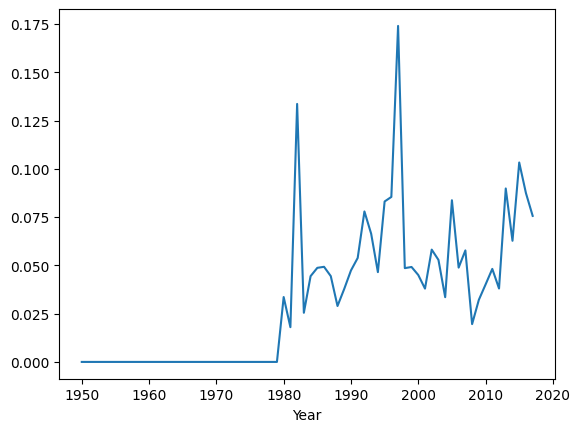

In [ ]:
fig, ax = plt.subplots(1,1)
tabla_media_triples_P.plot(ax = ax, label = 'Train')
plt.show()

### ARIMA PIVOTS (C) 2000-2010

In [ ]:
tabla_P_año_2000_2010 = df_clean_P[(df_clean_P['Year'] > 2000.0) & (df_clean_P['Year'] < 2010.0)]
tabla_P_año_2000_2010.head()

,Player,height_x,weight_x,year_start,year_end,position,birth_date,Year,Pos,Age,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
9710,Chris Dudley,188.0,81.0,1988,2003,C,"February 22, 1965",2001.0,C,35.0,...,0.389,64.0,119.0,183.0,18.0,14.0,29.0,26.0,111.0,72.0
9711,Chris Dudley,188.0,81.0,1988,2003,C,"February 22, 1965",2002.0,C,36.0,...,0.533,27.0,53.0,80.0,13.0,3.0,14.0,14.0,42.0,48.0
9712,Chris Dudley,188.0,81.0,1988,2003,C,"February 22, 1965",2003.0,C,37.0,...,0.000,2.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0
10463,Will Perdue,213.0,108.0,1989,2001,C,"August 29, 1965",2001.0,C,35.0,...,0.500,6.0,12.0,18.0,2.0,3.0,2.0,0.0,8.0,14.0
10841,Vlade Divac,216.0,110.0,1990,2005,C,"February 3, 1968",2001.0,C,32.0,...,0.691,207.0,466.0,673.0,231.0,87.0,93.0,192.0,242.0,974.0


In [ ]:
tabla_media_triples_P_2000 = tabla_P_año_2000_2010.groupby('Year')['3P%'].mean()
tabla_media_triples_P_2000

Year
2001.0    0.037971
2002.0    0.058164
2003.0    0.052841
2004.0    0.033535
2005.0    0.083730
2006.0    0.048843
2007.0    0.057759
2008.0    0.019577
2009.0    0.032143
Name: 3P%, dtype: float64

In [ ]:
arima = ARIMA(endog = tabla_media_triples_P_2000, order = (5,1,1))
arima_fit = arima.fit()
print(arima_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    3P%   No. Observations:                    9
Model:                 ARIMA(5, 1, 1)   Log Likelihood                  20.127
Date:                Wed, 22 Nov 2023   AIC                            -26.255
Time:                        07:41:23   BIC                            -25.699
Sample:                             0   HQIC                           -30.005
                                  - 9                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4480      7.952     -0.056      0.955     -16.034      15.138
ar.L2         -0.1307      7.666     -0.017      0.986     -15.156      14.895
ar.L3         -0.3933      4.695     -0.084      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
predicciones = arima_fit.forecast(steps= 5)
predicciones.index = [2010.0,2011.0,2012.0, 2013.0,2014.0]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


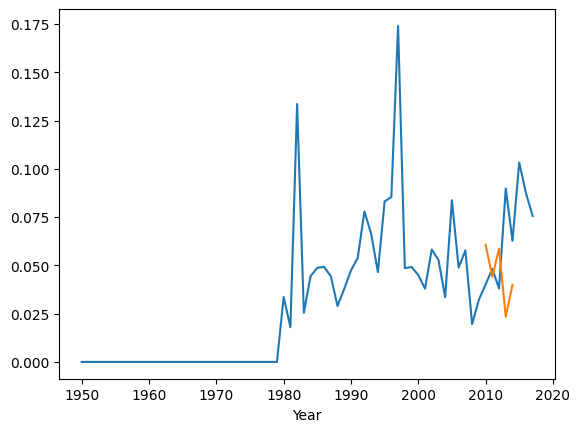

In [ ]:
fig, ax = plt.subplots(1,1)
tabla_media_triples_P.plot(ax = ax, label = 'Train')
predicciones.plot(ax = ax, label = 'Predicciones')
plt.show()

### ARIMA PIVOTS (C) 2018-2022

In [ ]:
arima = ARIMA(endog = tabla_media_triples_P, order = (5,1,1))
arima_fit = arima.fit()
print(arima_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    3P%   No. Observations:                   68
Model:                 ARIMA(5, 1, 1)   Log Likelihood                 151.464
Date:                Wed, 22 Nov 2023   AIC                           -288.927
Time:                        07:42:23   BIC                           -273.494
Sample:                             0   HQIC                          -282.820
                                 - 68                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2976      6.977     -0.043      0.966     -13.972      13.376
ar.L2         -0.0136      4.564     -0.003      0.998      -8.959       8.931
ar.L3         -0.1856      1.702     -0.109      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1363: RuntimeWarning: divide by zero encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum


In [ ]:
predicciones = arima_fit.forecast(steps= 5)
predicciones.index = [2018.0,2019.0,2020.0, 2021.0,2022.0]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


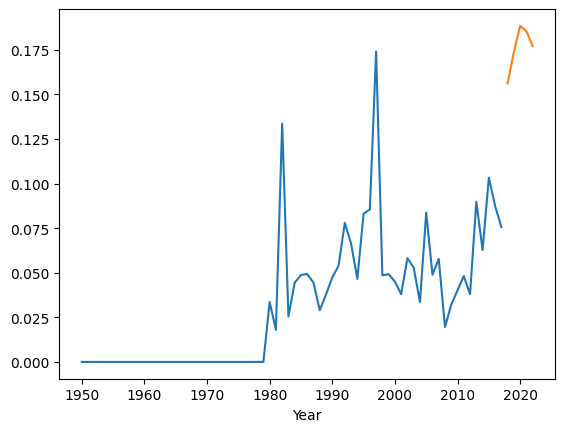

In [ ]:
fig, ax = plt.subplots(1,1)
tabla_media_triples_P.plot(ax = ax, label = 'Train')
predicciones.plot(ax = ax, label = 'Predicciones')
plt.show()


### INFORMACIÓN SOBRE LA POSICIÓN DE ALA-PIVOT (C-F)

In [ ]:
df_clean_AP = df_clean_copy[df_clean_copy['position'] == 'C-F']
df_clean_AP.head()

,Player,height_x,weight_x,year_start,year_end,position,birth_date,Year,Pos,Age,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
235,Kleggie Hermsen,206.0,102.0,1947,1953,C-F,"March 12, 1923",1950.0,C-F,26.0,...,0.619,0.0,0.0,0.0,98.0,0.0,0.0,0.0,267.0,545.0
236,Kleggie Hermsen,206.0,102.0,1947,1953,C-F,"March 12, 1923",1951.0,C-F,27.0,...,0.654,0.0,0.0,448.0,92.0,0.0,0.0,0.0,261.0,533.0
237,Kleggie Hermsen,206.0,102.0,1947,1953,C-F,"March 12, 1923",1953.0,C-F,29.0,...,0.600,0.0,0.0,19.0,4.0,0.0,0.0,0.0,18.0,11.0
238,Kleggie Hermsen,206.0,102.0,1947,1953,C-F,"March 12, 1923",1953.0,C-F,29.0,...,0.500,0.0,0.0,7.0,0.0,0.0,0.0,0.0,6.0,1.0
239,Kleggie Hermsen,206.0,102.0,1947,1953,C-F,"March 12, 1923",1953.0,C-F,29.0,...,0.667,0.0,0.0,12.0,4.0,0.0,0.0,0.0,12.0,10.0


In [ ]:
#información sobre la posición de Ala-Pivot

tabla_media_triples_AP = df_clean_AP.groupby('Year')['3P%'].mean()
tabla_media_triples_AP

Year
1950.0    0.000000
1951.0    0.000000
1952.0    0.000000
1953.0    0.000000
1954.0    0.000000
            ...   
2013.0    0.130789
2014.0    0.187864
2015.0    0.171962
2016.0    0.211200
2017.0    0.187605
Name: 3P%, Length: 68, dtype: float64

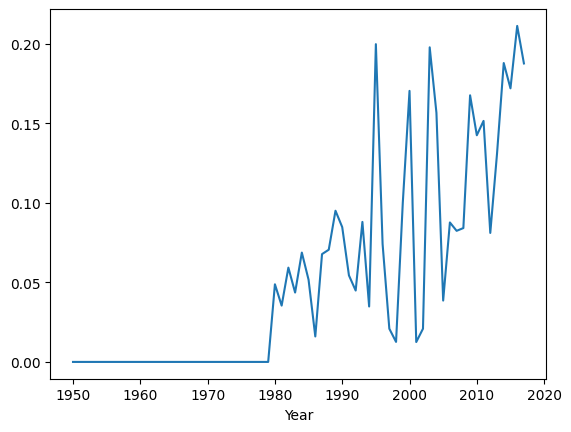

In [ ]:
fig, ax = plt.subplots(1,1)
tabla_media_triples_AP.plot(ax = ax, label = 'Train')
plt.show()

### ARIMA ALA-PIVOTS (C-F) 2000-2010

In [ ]:
tabla_AP_año_2000_2010 = df_clean_AP[(df_clean_AP['Year'] > 2000.0) & (df_clean_AP['Year'] < 2010.0)]
tabla_AP_año_2000_2010.head()

,Player,height_x,weight_x,year_start,year_end,position,birth_date,Year,Pos,Age,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
9932,Olden Polynice,211.0,99.0,1988,2004,C-F,"November 21, 1964",2001.0,C,36.0,...,0.262,157.0,221.0,378.0,31.0,27.0,77.0,78.0,241.0,429.0
9933,Olden Polynice,211.0,99.0,1988,2004,C-F,"November 21, 1964",2004.0,C,39.0,...,0.000,1.0,1.0,2.0,1.0,1.0,0.0,4.0,2.0,0.0
11871,Victor Alexander,206.0,120.0,1992,2002,C-F,"August 31, 1969",2002.0,C,32.0,...,0.500,7.0,22.0,29.0,6.0,0.0,1.0,5.0,6.0,40.0
13726,Carlos Rogers,211.0,99.0,1995,2002,C-F,"February 6, 1971",2001.0,C,29.0,...,0.558,48.0,91.0,139.0,9.0,10.0,18.0,17.0,33.0,179.0
13727,Carlos Rogers,211.0,99.0,1995,2002,C-F,"February 6, 1971",2002.0,C,30.0,...,0.526,14.0,24.0,38.0,3.0,5.0,6.0,5.0,17.0,59.0


In [ ]:
tabla_media_triples_AP_2000 = tabla_AP_año_2000_2010.groupby('Year')['3P%'].mean()
tabla_media_triples_AP_2000

Year
2001.0    0.012500
2002.0    0.020875
2003.0    0.197750
2004.0    0.156545
2005.0    0.038571
2006.0    0.087667
2007.0    0.082400
2008.0    0.084143
2009.0    0.167588
Name: 3P%, dtype: float64

In [ ]:
arima = ARIMA(endog = tabla_media_triples_AP_2000, order = (5,1,1))
arima_fit = arima.fit()
print(arima_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                    3P%   No. Observations:                    9
Model:                 ARIMA(5, 1, 1)   Log Likelihood                  15.174
Date:                Wed, 22 Nov 2023   AIC                            -16.349
Time:                        07:55:43   BIC                            -15.793
Sample:                             0   HQIC                           -20.099
                                  - 9                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1845    116.105     -0.002      0.999    -227.747     227.378
ar.L2         -1.3302     25.533     -0.052      0.958     -51.373      48.713
ar.L3         -0.0521    146.224     -0.000      1.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
predicciones = arima_fit.forecast(steps= 5)
predicciones.index = [2010.0,2011.0,2012.0, 2013.0,2014.0]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


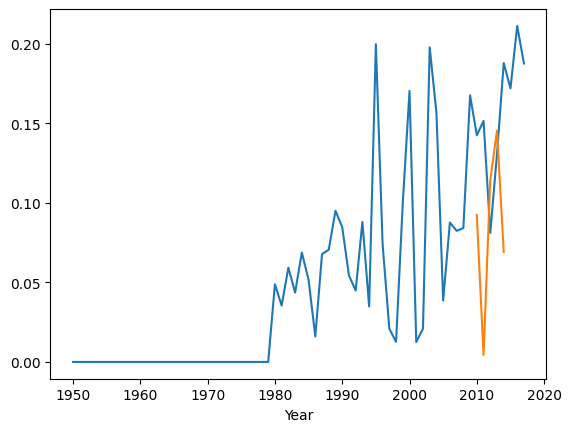

In [ ]:
fig, ax = plt.subplots(1,1)
tabla_media_triples_AP.plot(ax = ax, label = 'Train')
predicciones.plot(ax = ax, label = 'Predicciones')
plt.show()

### ARIMA ALA-PIVOTS (C-F) 2018-2022

In [ ]:
arima = ARIMA(endog = tabla_media_triples_AP, order = (5,1,1))
arima_fit = arima.fit()
print(arima_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    3P%   No. Observations:                   68
Model:                 ARIMA(5, 1, 1)   Log Likelihood                 124.556
Date:                Wed, 22 Nov 2023   AIC                           -235.111
Time:                        08:16:08   BIC                           -219.678
Sample:                             0   HQIC                          -229.004
                                 - 68                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4467      1.440     -0.310      0.756      -3.270       2.376
ar.L2         -0.6721      1.004     -0.670      0.503      -2.640       1.295
ar.L3         -0.3652      1.176     -0.311      0.7

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1363: RuntimeWarning: divide by zero encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum


In [ ]:
predicciones = arima_fit.forecast(steps= 5)
predicciones.index = [2018.0,2019.0,2020.0, 2021.0,2022.0]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


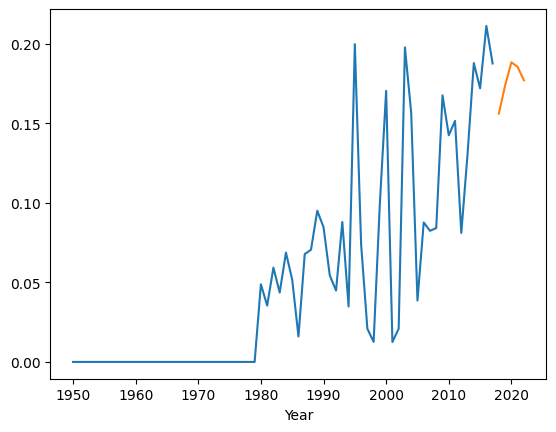

In [ ]:
fig, ax = plt.subplots(1,1)
tabla_media_triples_AP.plot(ax = ax, label = 'Train')
predicciones.plot(ax = ax, label = 'Predicciones')
plt.show()